In [1]:
import sys
sys.path.append('..')
from d2l import torch as d2l
import torch

In [2]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm  = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

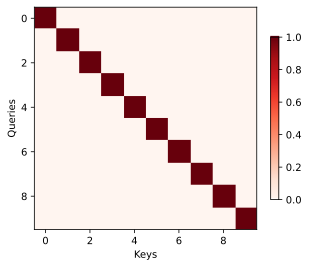

In [3]:
attention_weights = torch.eye(10).reshape(1, 1, 10, 10)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries', figsize=(5.0, 5.0))

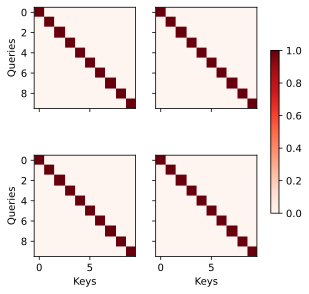

In [4]:
attention_weights_Two = torch.repeat_interleave(attention_weights, 2, dim=0) 
attention_weights_Four = torch.repeat_interleave(attention_weights_Two, 2, dim=1) 
show_heatmaps(attention_weights_Four, xlabel='Keys', ylabel='Queries', figsize=(5.0, 5.0))